<a href="https://colab.research.google.com/github/Jaybhatt216/EIT/blob/main/CATS_DOGS_something.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat and Dog Image Classifyier

In [ ]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=15a771acd4430014a054a87c98b5ea7978b1e64b0bc7f75244e009c526e5514a
  Stored in directory: c:\users\76gwi\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


You should consider upgrading via the 'c:\users\76gwi\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


## Packages and Installs

In [ ]:
# Storing and Anaysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from  IPython.display import display, HTML, display_html
from PIL import Image
import glob

%matplotlib inline
sns.set()

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

# Misc.
import os
from pathlib import Path

# Importing the Datasets

In [ ]:
def label_list(CatDog):
    """Makes a list of all the images and labels them with '0' or '1, then shuffles data """
    # Empty list
    data = []
    
    # Labels images based if it is a Cat or Dog
    for img in CatDog:
        name = str(img)
        name = name.split('\\')
        name = name[-1].split('.')
        if name[0] == 'cat':
            data.append((img, 0))
        else:
            data.append((img, 1))
            
    # Convert to Pandas
    data = pd.DataFrame(data, columns= ['images', 'label'])
    
    # Shuffle
    data = data.sample(frac = 1).reset_index(drop = True)

    return data

In [ ]:
# Creating Director locations
data_dir  = Path(r'C:/Users/76gwi/Google Drive/DataSets/Cats_Dogs Data')
train_dir = data_dir / 'train'
test_dir  = data_dir / 'test'

# Generate lists
train_images = train_dir.glob('*.jpg')
test_images  = test_dir.glob('*.jpg')

# New List with labels
Train = label_list(train_images)
Test  = label_list(test_images)


Total images Training set: 25000
Total Cats in Training set: 12500
Total Dogs in Training set: 12500


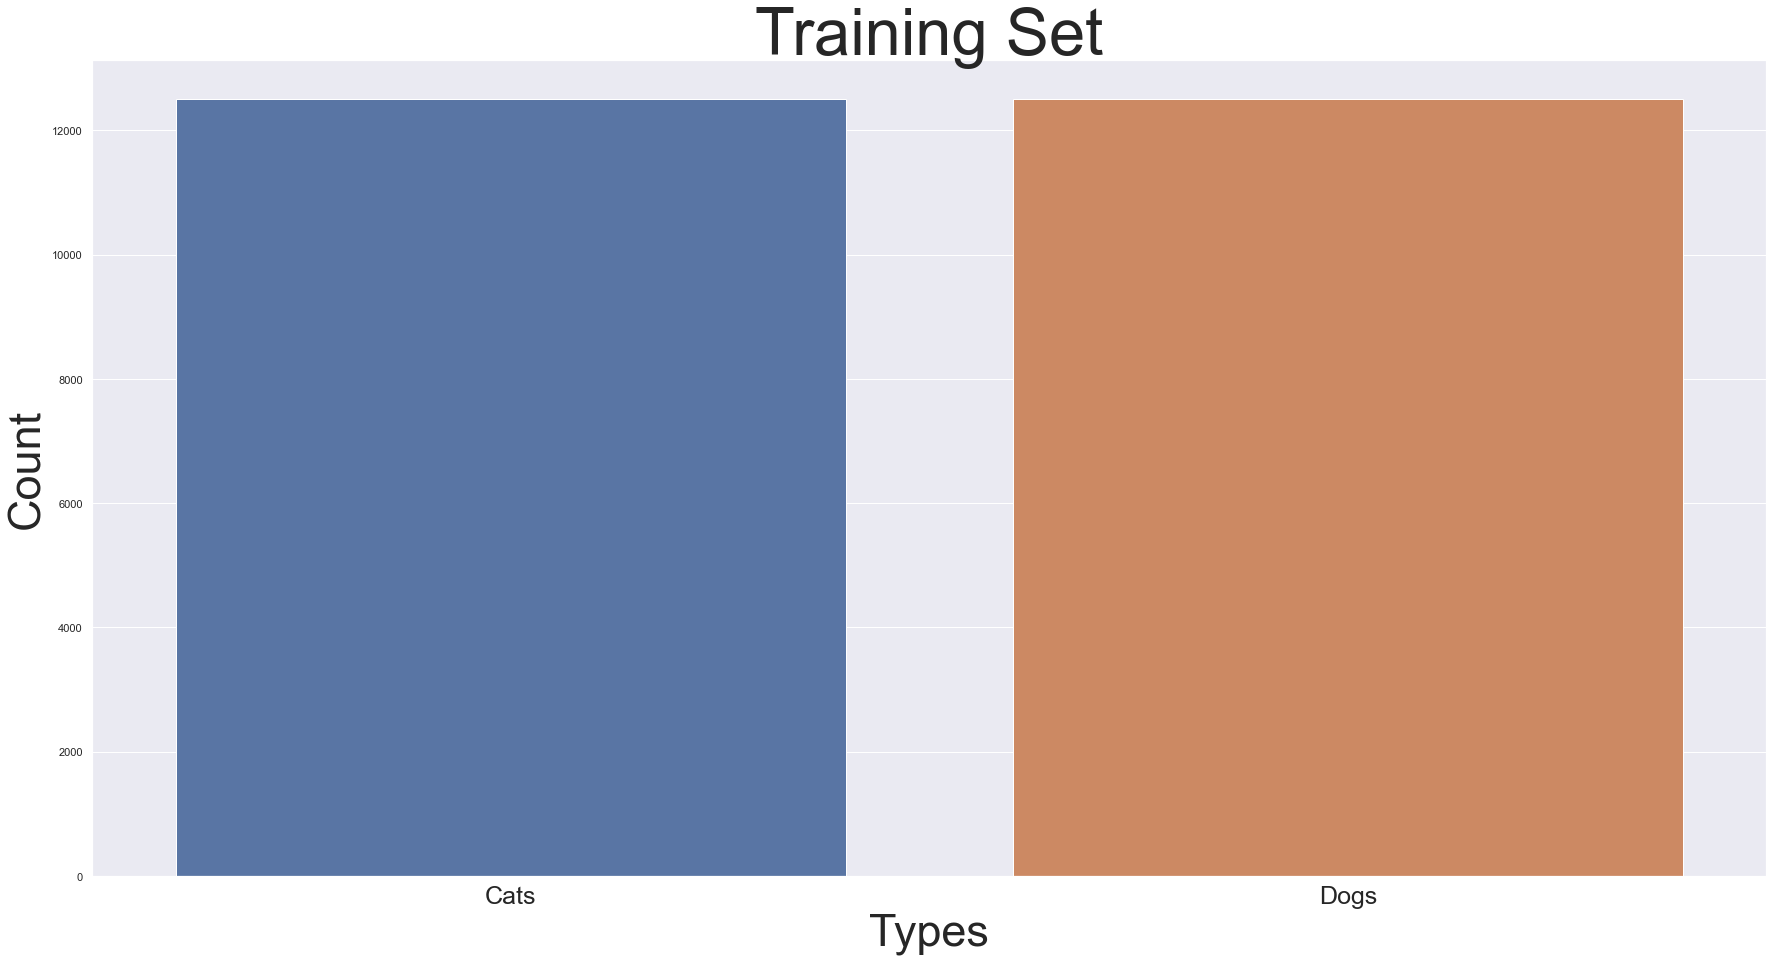

In [ ]:
# Print out the Number of Cases
cases_count = Train["label"].value_counts()
print(f'Total images Training set: {np.shape(Train)[0]}')
print(f'Total Cats in Training set: {cases_count.values[0]}')
print(f'Total Dogs in Training set: {cases_count.values[1]}')

# Plot the Number of Cases
plt.figure(figsize = (30,15))
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Training Set', fontsize = 65)
plt.xlabel('Types', fontsize = 45)
plt.ylabel('Count', fontsize = 45)
plt.xticks([0,1], ['Cats', 'Dogs'], fontsize = 25)
plt.show()

### Sample Image

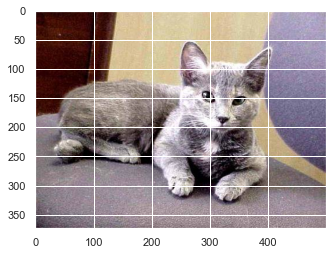

In [ ]:
# Shows sample image
img = plt.imread(Train.iloc[0][0])
plt.imshow(img)

# Convolutional Neural Network

In [ ]:
# Quick feature changes
img_width = 128
img_height = 128
img_size = [img_width, img_height]
batch_size = 15

In [ ]:
# Convolutional Neural Network
"""3 Hidden Layers (Nodes: 32, 64, 128, 512)"""
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (img_width, img_height,3)))
model.add(BatchNormalization()) # Normalize 
model.add(MaxPooling2D(pool_size=(2, 2))) # Max value in 2x2 segment is chosen
model.add(Dropout(0.25)) # 25% chance to drop a node

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 25% chance to drop a node

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 25% chance to drop a node

model.add(Flatten()) # Flattens the 14x14x128 into 25,088 (changes dimensions into just one)

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # 50% of a node dropping
model.add(Dense(2, activation='sigmoid')) # 2 because we have cat and dog classes

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        
    
# Display Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [ ]:
# Breaking up the Data set (pandas)
# df_train = Train.iloc[:15000,:].astype(str) # 60% training
# df_val   = Train.iloc[15000:20000,:].astype(str) # 20% validation
# df_test  = Train.iloc[20000:,:].astype(str)  # 20% testing

df_train = Train.iloc[:15000,:].astype(str) # 60% training
df_val   = Train.iloc[15000:20000,:].astype(str) # 20% validation
df_test  = Train.iloc[20000:,:].astype(str)  # 20% testing

In [ ]:
# Settings for how the Generator acts with images
train_datagen = ImageDataGenerator(
    rotation_range=15, # Rotation
    rescale=1./255, # Re-Scaling
    shear_range=0.1, # Tilts the image (Google 'image shear examples')
    zoom_range=0.2, # Zooming (basically distance)
    horizontal_flip=True, # Mirroring
    width_shift_range=0.1, # Shifted Left and Right
    height_shift_range=0.1 # Shifted Up and Down
)

# Generator for the Training set
train_generator = train_datagen.flow_from_dataframe(
    df_train, # Our DataFrame 
    "../input/train/train/", # temp folder location
    x_col = 'images', # Column name it looks for
    y_col = 'label', # Column name it looks for
    target_size = img_size, # Normalizes all images to the same size
    class_mode = 'categorical', 
    batch_size = batch_size # How much data is fed in at once
)

# Generator for the Validation set
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    df_val, 
    "../input/train/train/", 
    x_col='images',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 15000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


### What the Generator is doing

In [ ]:
# Example Generator for just one image
example_df = df_train.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../input/train/train/", 
    x_col='images',
    y_col='label',
    target_size=img_size,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


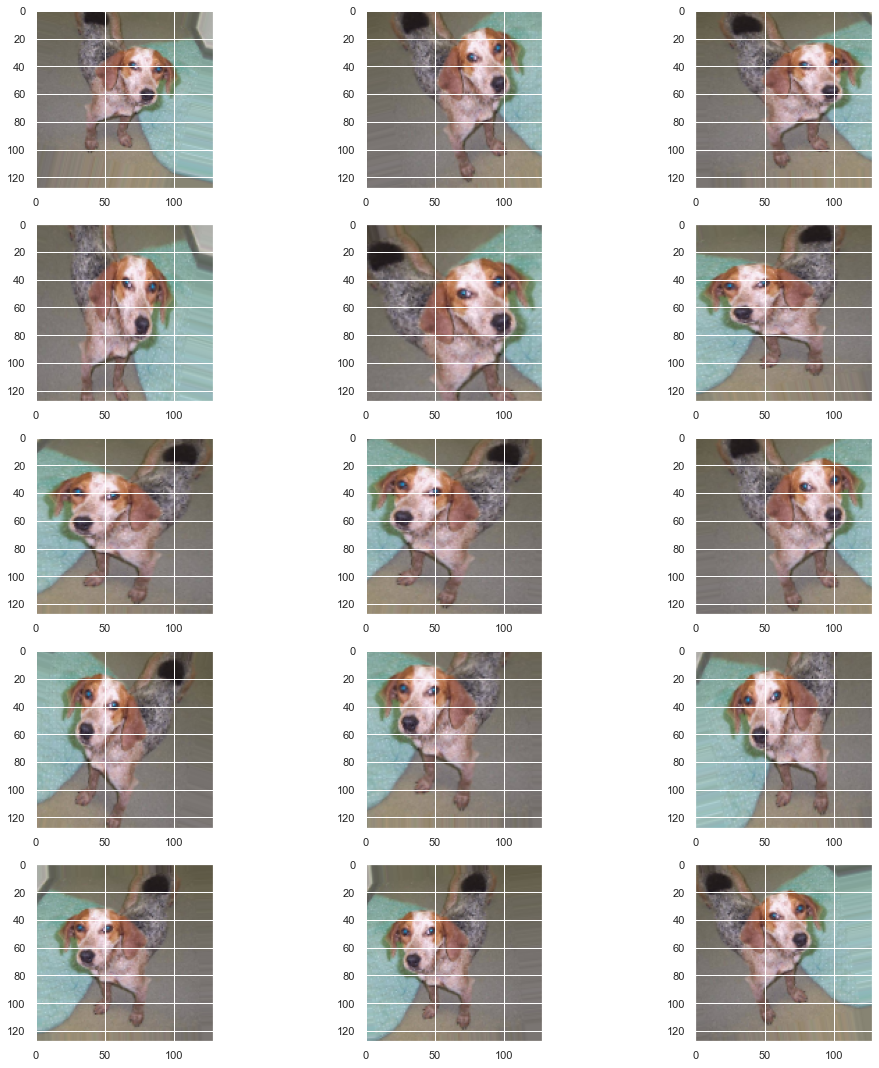

In [ ]:
# Subplots of what the Generator does 
plt.figure(figsize=(15, 15))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [ ]:
# Setting up callbacks
"""This stops the training if the Loss funcition increases or if the Learning Rate needs to increase or decrease"""
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]


In [ ]:
# Location where the weights are saved
path_of_weights = Path(r'C:\\Users\\76gwi\\CatDog.h5')

# If the weight exists then it is loaded into model, else it creates a new one
try: 
    model.load_weights(str(path_of_weights))
except OSError:
    print('No new weights found. Creating a new weights.')

# Training the A.i. happens here
epochs = 50
history = model.fit_generator(
        train_generator,
        epochs           = epochs, # Number of times to run
        validation_data  = validation_generator, 
        validation_steps = 500, # size of validation set
        steps_per_epoch  = 100, # size of training set
        callbacks        = callbacks
)

No new weights found. Creating a new weights.


c:\users\76gwi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 186s 2s/step - loss: 1.1489 - accuracy: 0.5573 - val_loss: 0.7418 - val_accuracy: 0.4994
Epoch 2/50
 15/100 [===>..........................] - ETA: 1:11 - loss: 0.9255 - accuracy: 0.5718

KeyboardInterrupt: 

In [ ]:
# Saving the weights
model.save_weights('CatDog.h5')

# Visualize Training

In [ ]:
# Plots Loss and Validation function value for each iteration
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

NameError: name 'history' is not defined

<Figure size 864x432 with 0 Axes>

# Testing Generator

In [ ]:
# Builds the Test set Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    "../input/test1/test1/", 
    x_col='images',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 5000 validated image filenames.


In [ ]:
# Confusion Matrix Function
from sklearn.metrics import confusion_matrix
def Conf_Matrix(y_test, y_hat):
    cm = confusion_matrix(y_test, y_hat, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='')

In [ ]:
# Predicts the Test set
predict = model.predict_generator(test_generator, steps = 5000/10)

c:\users\76gwi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
# Rounds the prediction (becuase it is a probability)
y_hat = np.argmax(predict, axis=-1)

In [ ]:
# Converts from 'integer' to a 'string'
y_hat = y_hat.astype(str)

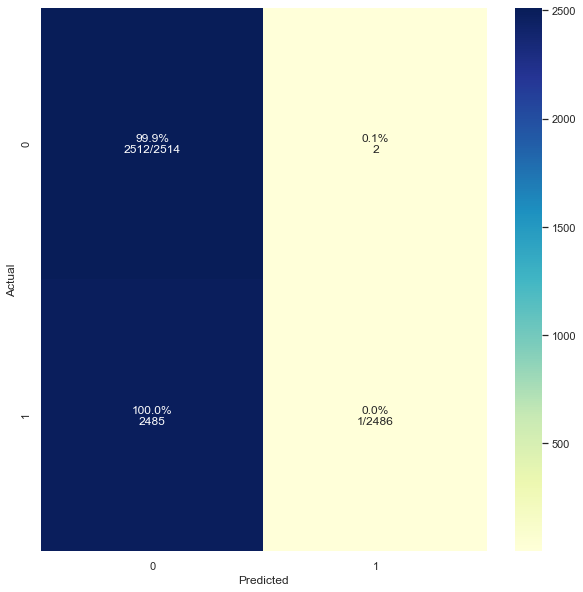

In [ ]:
# Visualization of the Precision
Conf_Matrix(df_test.iloc[:,1], y_hat[:5000])

# The Best Cats <3

This part is just for friends and family

In [ ]:
# Loads in picture of Buffy (my cat)
Buffy = plt.imread(r'C:\Users\76gwi\Google Drive\DataSets\Cats_Dogs Data\Buffy.jpg')

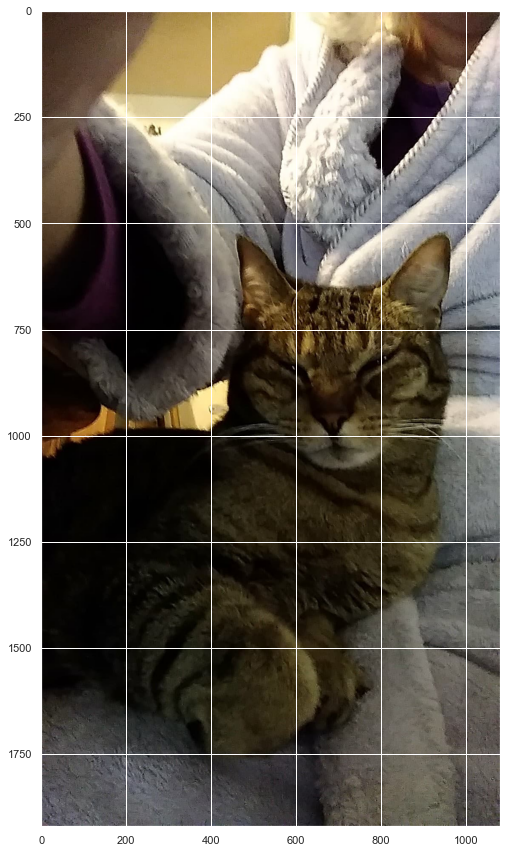

In [ ]:
# Displays image
plt.figure(figsize= (15,15))
plt.imshow(Buffy)

In [ ]:
# Get Directory Location
Buffy = [r'C:\Users\76gwi\Google Drive\DataSets\Cats_Dogs Data\Buffy.jpg']

# Converts to Pandas DataFrame
Buffy = pd.DataFrame(Buffy, columns=['images'])

# Builds Generator for Buffy
Buffy_generator = test_gen.flow_from_dataframe(
    Buffy, 
    "../input/test1/test1/", 
    x_col='images',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 1 validated image filenames.


In [ ]:
# Predicts if Buffy is a Cat
is_Buffy_cat = model.predict_generator(Buffy_generator, steps = 1)

In [ ]:
# Prints out the results of what the A.i. thinks
is_Buffy_cat = np.argmax(is_Buffy_cat, axis=-1)
if is_Buffy_cat == 0:
    print('Yes, Buffy is my Princess KITTY!')
elif is_Buffy_cat == 1:
    print('Buffy is dog... I still luv her!')

Yes, Buffy is my Princess KITTY!


In [ ]:
# Loads in the image of Maro
Maro  = plt.imread(r'C:\Users\76gwi\Google Drive\DataSets\Cats_Dogs Data\Maro.jpg')

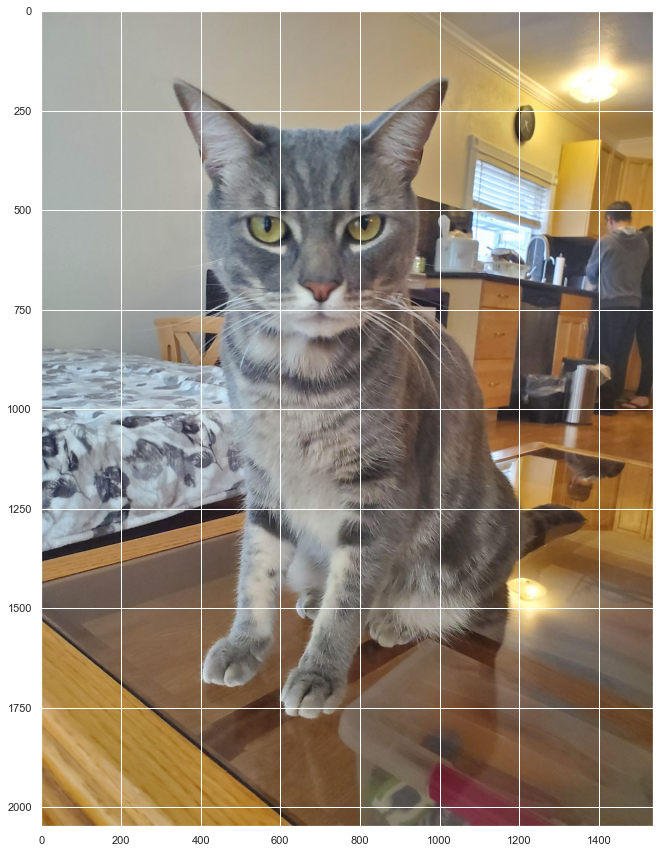

In [ ]:
# Displays the picture of Maro
plt.figure(figsize= (15,15))
plt.imshow(Maro)

In [ ]:
# Stores image location
Maro = [r'C:\Users\76gwi\Google Drive\DataSets\Cats_Dogs Data\Maro.jpg']

# Converts into Pandas DataFrame
Maro = pd.DataFrame(Maro, columns=['images'])

# Creates Generator for Maro
Maro_generator = test_gen.flow_from_dataframe(
    Maro, 
    "../input/test1/test1/", 
    x_col='images',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 1 validated image filenames.


In [ ]:
# Predicts if Maro is a Cat
is_Maro_cat = model.predict_generator(Maro_generator, steps = 1)

In [ ]:
# Prints results of what the A.i. thinks
is_Maro_cat = np.argmax(is_Maro_cat, axis=-1)
if is_Maro_cat == 0:
    print('Yes, Maro is a super duper KITTY!')
elif is_Maro_cat == 1:
    print('Maro is doggo... A SUPER ADORABLE DOGGO!')

Yes, Maro is a super duper KITTY!
